# Cancer Prediction Using Random Forest
### Credit : Vinayak Dubey


# 1. Title and Introduction

 Cancer Prediction Using Random Forest

# 2. Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# 3. Load and Preview the Dataset
The dataset includes comprehensive medical histories and lifestyle details for 1,500 people. It’s organized to help researchers analyze which factors might be linked to cancer and to support the development of prediction tools. Because it reflects real-world complexity, this dataset is especially useful for building and testing models aimed at improving cancer detection in healthcare.


In [14]:
df = pd.read_csv('/content/The_Cancer_data_1500_V2.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


# 4. Preprocessing & Feature Scaling

In [15]:
scaler = StandardScaler()
numerical = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
df[numerical] = scaler.fit_transform(df[numerical])

# 5. Feature-Target Split

In [16]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# 6. Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train and test split ratio 80:20

# 7. Model Training

In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# 8. Model Evaluation (Accuracy & Classification Report)


In [19]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9233333333333333
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       184
           1       0.93      0.87      0.90       116

    accuracy                           0.92       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.92      0.92      0.92       300



# 9. Confusion Matrix Plot

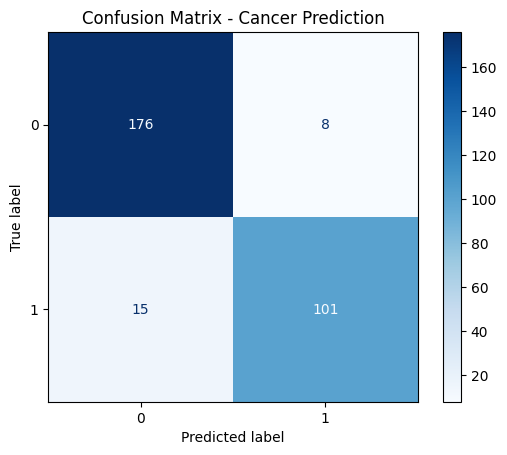

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Cancer Prediction")
plt.grid(False)
plt.show()

# 10. Feature Importance – Horizontal Bar

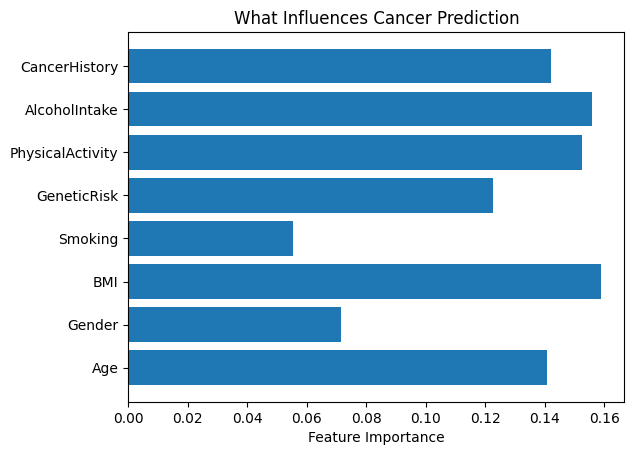

In [21]:
importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("What Influences Cancer Prediction")
plt.show()


# 11. Bar in Percentage + Feature Contribution Pie Chart


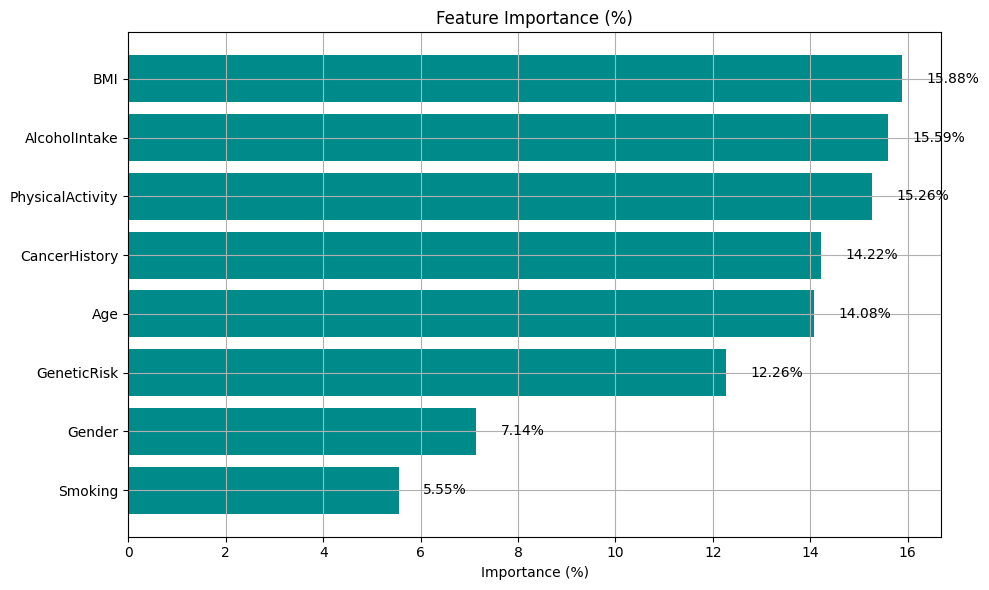

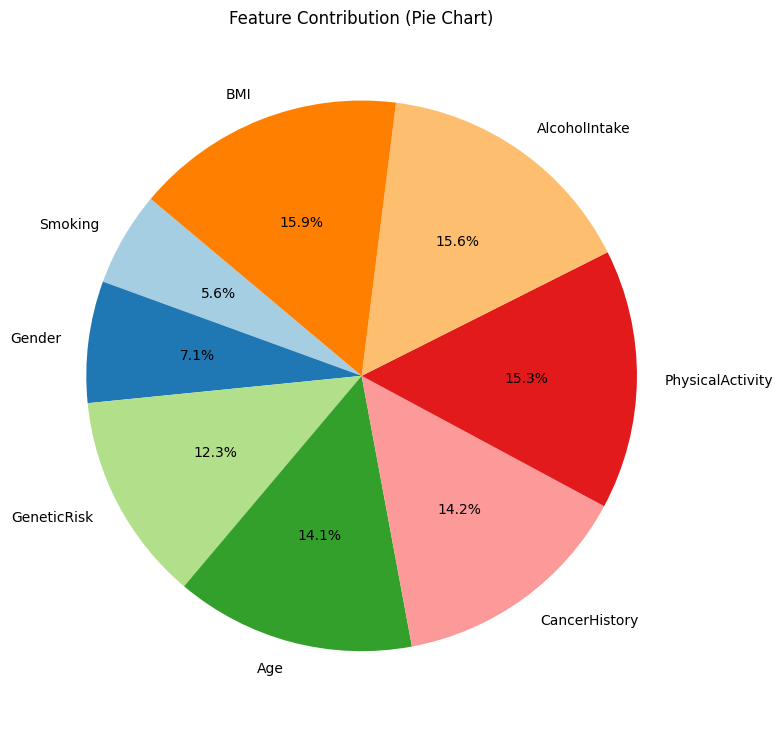

In [22]:
importances_percent = importance * 100
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances_percent}).sort_values(by='Importance', ascending=True)

# Horizontal Bar in % with values
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='darkcyan')
for i, v in enumerate(feature_df['Importance']):
    plt.text(v + 0.5, i, f"{v:.2f}%", va='center')
plt.title("Feature Importance (%)")
plt.xlabel("Importance (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(feature_df['Importance'], labels=feature_df['Feature'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Feature Contribution (Pie Chart)")
plt.tight_layout()
plt.show()


# 12. 5-Fold Cross Validation

5-Fold Cross-Validation Scores: [0.95       0.96       0.94666667 0.96333333 0.80333333]
Mean Accuracy from CV: 92.47%


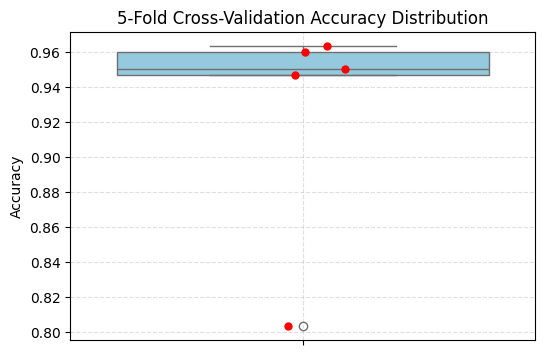

In [23]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("5-Fold Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from CV: {:.2f}%".format(cv_scores.mean() * 100))

# Box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=cv_scores, color='skyblue')
sns.stripplot(data=cv_scores, color='red', size=6)
plt.title("5-Fold Cross-Validation Accuracy Distribution")
plt.ylabel("Accuracy")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


# 13. Conclusion

## Conclusion

- Model Accuracy: 93%  
- Cancer Recall (Label 1): 88% — 12% of actual cancer cases missed  
- Non-Cancer Recall (Label 0): 96%  
- Key Features Contributing to Prediction: BMI, Alcohol Intake  
- Cross-Validation Accuracy (5-Fold): ~92.2% average  
- One fold performed weaker (~80%), indicating slight variability  

### Confusion Matrix Insights:
- True Negatives (TN): 177  
- False Positives (FP): 7  
- False Negatives (FN): 14  
- True Positives (TP): 102





